# Not a Number (NaN) and masked arrays

The special value  Not a Number (NaN)  is defined according IEEE standards for floating point variables. NaN is a numeric data type value representing an undefined or unrepresentable value.

There are at least two ways to deal with undefined or unrepresentable data in Python

 1. Using NaNs or [sentinel values](https://en.wikipedia.org/wiki/Sentinel_value)
 2. Using masked arrays
 
The differences between the two approaches are subtle. NaN can be used similar as masked arrays to indicate missing or undefined values. However, in the latter case it is possible to distinguish if a value is bad or missing. The advantage of the masked array data type is that the core methods automatically take the mask into account while the effect has to be considered carefully when using the array without the mask.

http://docs.scipy.org/doc/numpy-1.10.0/reference/maskedarray.generic.html


NaN is defined as a special state of a floating point variable. It can be obtained as the result of a calculation. Depending on the setting it can be a [quite or signaling NaN](https://en.wikipedia.org/wiki/NaN). A signaling NaN is producing an error.

One particular pitfall when dealing with NaNs is their special characteristics for comparisons

In [1]:
x=float('nan')
x==x

False

The question is how to identify and use this special state? The Numpy module provides functions to work with NaNs.

## Numpy

In [2]:
%pylab inline
a=array([1.0,2.0,3.0,nan,5.0])

Populating the interactive namespace from numpy and matplotlib


In [3]:
mean(a)

nan

In [4]:
a.mean() # numpy core array method

nan

A single NaN in an array prevents the calculation of the mean when using the standard mean function. Often we want to know the mean of the rest in case of single missing data. The usual approach is to flag the missing data with NaN and to do the calculation with the remaining data. 

## Treating NaNs

In [5]:
nanmean(a)

2.75

In [6]:
nansum(a)

11.0

In [7]:
ind=isnan(a)
ind

array([False, False, False,  True, False], dtype=bool)

In [8]:
ind=isfinite(a)
ind

array([ True,  True,  True, False,  True], dtype=bool)

In [9]:
a[ind]

array([ 1.,  2.,  3.,  5.])

In [10]:
sum(a[ind])

11.0

In [11]:
mean(a[ind])

2.75

In [12]:
a_masked=np.ma.masked_invalid(a)
a_masked

masked_array(data = [1.0 2.0 3.0 -- 5.0],
             mask = [False False False  True False],
       fill_value = 1e+20)

In [13]:
a_masked.data

array([  1.,   2.,   3.,  nan,   5.])

In [14]:
a_masked.mask

array([False, False, False,  True, False], dtype=bool)

In [15]:
mean(a_masked)

2.75

## Pandas 

In [16]:
import pandas as pd
S=pd.Series(a)
S

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

## Performance evaluation

In the following we want to compare the different methods in terms of computational efficiency.

### Masked arrays

In [17]:
%%timeit
mean(a_masked)

22.3 µs ± 836 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Nanmean()

Signature: nanmean(a, axis=None, dtype=None, out=None, keepdims=False)
Docstring:
Compute the arithmetic mean along the specified axis, ignoring NaNs.

Returns the average of the array elements.  The average is taken over
the flattened array by default, otherwise over the specified axis.
`float64` intermediate and return values are used for integer inputs.

For all-NaN slices, NaN is returned and a `RuntimeWarning` is raised.


In [18]:
%%timeit
nanmean(a)

26.2 µs ± 562 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [124]:
nanmean(a)

2.75

### Pandas

In [19]:
S.mean()

2.75

In [20]:
%%timeit
S.mean()

51.1 µs ± 311 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
T=pd.DataFrame({'nanmean':[38.9,36.5,37.1],'ma':[25,29.4,30.1],'Pandas':[18.1,18.9,18.1]})

In [90]:
T # Results of evaluation: Pandas twice as fast as nanmean

,Pandas,ma,nanmean
0,18.1,25.0,38.9
1,18.9,29.4,36.5
2,18.1,30.1,37.1


In [94]:
T.mean()

Pandas     18.366667
ma         28.166667
nanmean    37.500000
dtype: float64

### numpy.mean with indexing

In [22]:
%%timeit
ind=isfinite(a)
a[ind].mean()

6.02 µs ± 27.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [109]:
T['a[ind].mean()']=[8.82,9,8.77]
T

,Pandas,ma,nanmean,a[ind].mean()
0,18.1,25.0,38.9,8.82
1,18.9,29.4,36.5,9.00
2,18.1,30.1,37.1,8.77


## Conclusion

Pandas objects are well optimized for speed but the numpy core mean method is faster when used with indexing for the dropping NaNs. The time need for the calculation differs by a factor up to four. Therefore, we conlude it is worthwhile to test the performance of different functions when computational time is critical. 

Other factors are also important for the decision of a specific implementation, like the elegance of implementation: The fastest method needs twice as much lines of code (2 compared to 1 line) and the code is therefore more expensive to maintain.

# Exercise

Consider the following data set: We have two vectors $x$ and $y$ that are statistically depend. Both vectors have a length $N$ but they include a number of missing values (NaN). Now you want to calculate a linear regression using the function of the module scipy.stats.
As only just a single NaN will prevent the calculation you want to sort them out. At the same time you have to make sure that the dependency between x and y is not lost. Therefore, the task is to calculate two new variables $X$ and $Y$ derived from $x$ and $y$ that consist only of finite values.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:7: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


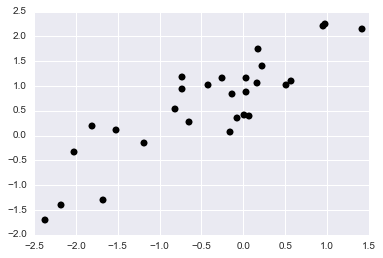

In [191]:
N=40
M=(rand(1)*N/2).astype(int)
mean, cov = [0, 1], [(1, .9), (.9, 1)]
data = np.random.multivariate_normal(mean, cov, N)
x,y=data[:,0],data[:,1]

i=(rand(M)*N).astype(int)
#x[i]=nan
i=(rand(M)*N).astype(int)
y[i]=nan

plot(x,y,'ko')

## Tasks ##

 * create indices of NaNs
 * use indices to select only the good values for new variables
 * calculate regression and plot the result
 * print the number of replaced values for each $x$ and $y$ and the new resulting lengths of $X$ and $Y$
 * start with missing values only in $y$
 * uncomment the line with $x$ and try again

In [192]:
isfinite(y) # you may use this method

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True, False,  True], dtype=bool)

In [187]:
# x and y are given

#implement your solution here!

X=
Y=

In [184]:
import scipy.stats
scipy.stats.linregress(X,Y)

(nan, nan, nan, nan, nan)

Your result should be different from nan. Use the resulting values to plot the data pairs and the regression line.